In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


# Different Types of Cross-Validations in Machine Learning and Their Explanations

In [2]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [3]:
data=pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
data.shape

(768, 9)

In [6]:
x=data.drop("Outcome",axis=1)
y=data["Outcome"]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=51)
print(xtrain.shape)
print(xtest.shape)

(614, 8)
(154, 8)


In [7]:
#creating a fuction
def ModelScore(model):
    model.fit(xtrain,ytrain)
    y_pred=model.predict(xtest)
    accuracy=accuracy_score(ytest,y_pred)
    print("Accuracy score=",accuracy*100)
    
    

# Logistic Regression

In [8]:
LG=LogisticRegression()
ModelScore(LG)

Accuracy score= 77.92207792207793


# Different Types of Cross-Validations in Machine Learning and Their Explanations

****Machine learning and proper training go hand-in-hand. You can’t directly use or fit the model on a set of training data and say ‘Yes, this will work.’ To ensure that the model is correctly trained on the data provided without much noise, you need to use cross-validation techniques. These are statistical methods used to estimate the performance of machine learning models.

# Types of cross-validation

1. K-fold cross-validation
2. Stratified k-fold cross-validation
3. Leave-p-out cross-validation
4. Leave-one-out cross-validation
5. Monte Carlo (shuffle-split)

# 1) K-fold cross-validation


In this technique, the whole dataset is partitioned in k parts of equal size and each partition is called a fold. It’s known as k-fold since there are k parts where k can be any integer - 3,4,5, etc.

One fold is used for validation and other K-1 folds are used for training the model. To use every fold as a validation set and other left-outs as a training set, this technique is repeated k times until each fold is used once.

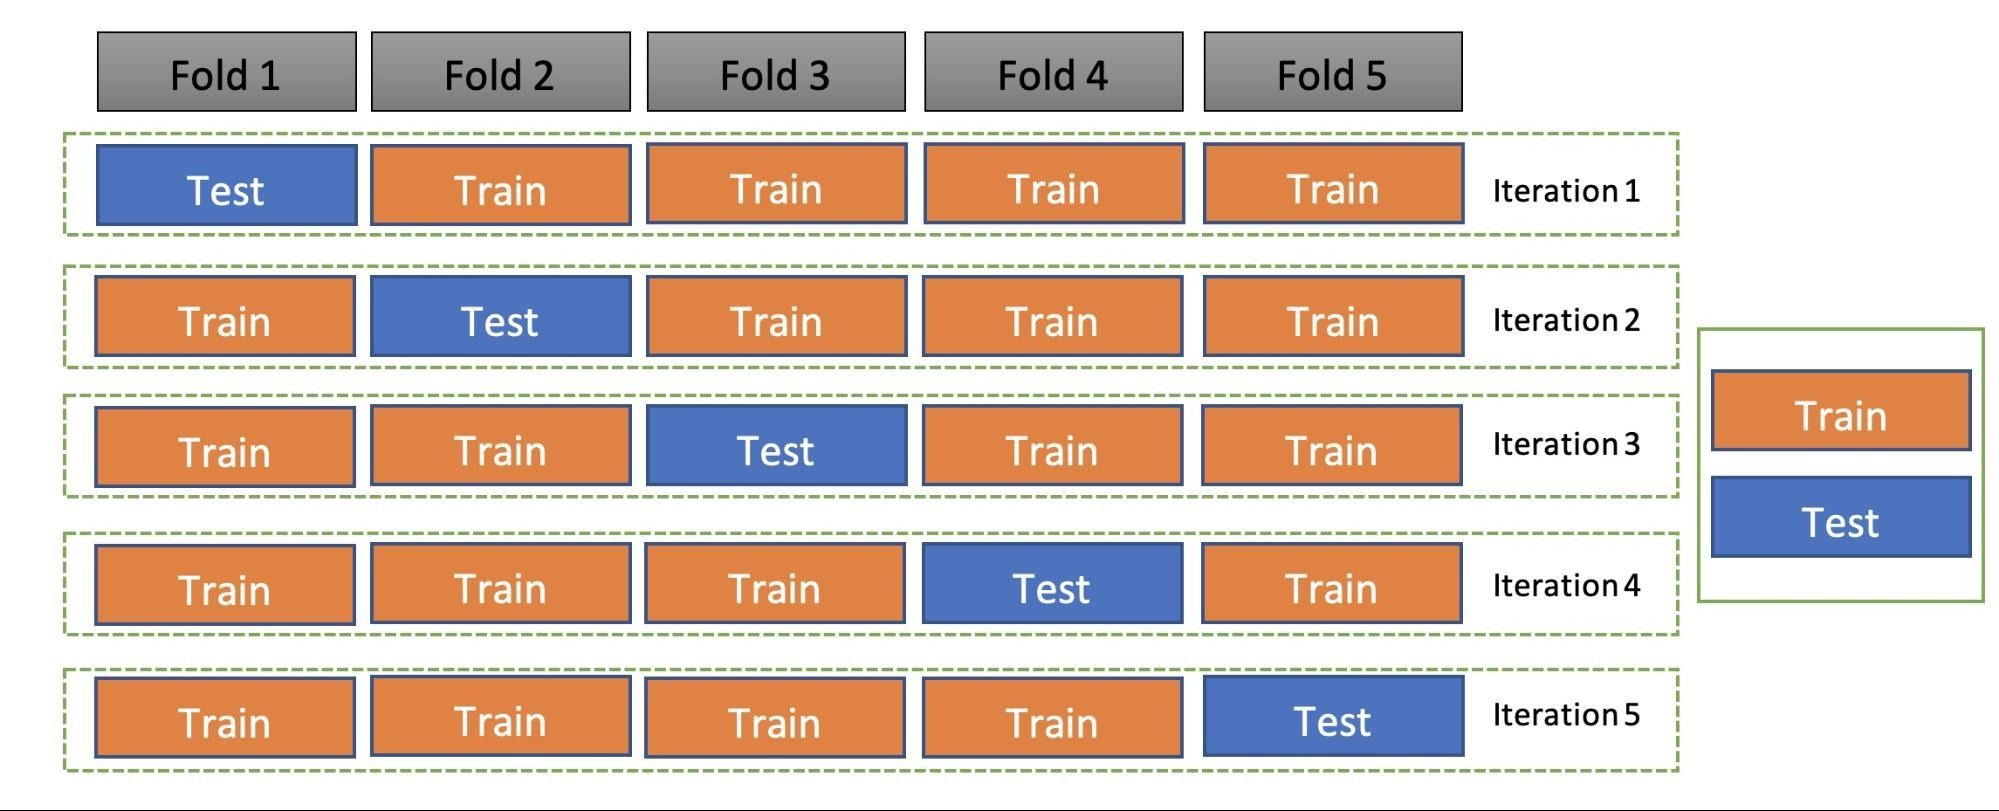


****The image above shows 5 folds and hence, 5 iterations. In each iteration, one fold is the test set/validation set and the other k-1 sets (4 sets) are the train set. To get the final accuracy, you need to take the accuracy of the k-models validation data.

This validation technique is not considered suitable for imbalanced datasets as the model will not get trained properly owing to the proper ratio of each class's data.

# Here’s an example of how to perform k-fold cross-validation using Python.

In [9]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

LG=LogisticRegression()
kfold=KFold(n_splits=5)
print("Training Dataset")
train_score=cross_val_score(LG,xtrain,ytrain,cv=kfold)
print("Cross Validation Scores={}".format(train_score))
print("Average Cross Validation Score={}".format(train_score.mean()))
print()
print("Testing Dataset")
test_score=cross_val_score(LG,xtest,ytest,cv=kfold)
print("Cross Validation Scores={}".format(test_score))
print("Average Cross Validation Score={}".format(test_score.mean()))



Training Dataset
Cross Validation Scores=[0.77235772 0.7804878  0.72357724 0.84552846 0.73770492]
Average Cross Validation Score=0.7719312275089965

Testing Dataset
Cross Validation Scores=[0.80645161 0.64516129 0.70967742 0.77419355 0.9       ]
Average Cross Validation Score=0.7670967741935484


# 2) Stratified k-fold cross-validation

****As seen above, k-fold validation can’t be used for imbalanced datasets because data is split into k-folds with a uniform probability distribution. Not so with stratified k-fold, which is an enhanced version of the k-fold cross-validation technique. Although it too splits the dataset into k equal folds, each fold has the same ratio of instances of target variables that are in the complete dataset. This enables it to work perfectly for imbalanced datasets, but not for time-series data.

![stratified_cv.png](https://amueller.github.io/aml/_images/stratified_cv.png)

# Here’s an example of how to perform Stratified k-fold cross-validation using python

In [10]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

LG=LogisticRegression()
skFold=StratifiedKFold(n_splits=5)

print("Training Dataset")
train_score=cross_val_score(LG,xtrain,ytrain,cv=skFold)
print("Cross Validation Scores={}".format(train_score))
print("Average Cross Validation Score={}".format(train_score.mean()))

print()

print("Testing Dataset")
test_score=cross_val_score(LG,xtest,ytest,cv=skFold)
print("Cross Validation Scores={}".format(test_score))
print("Average Cross Validation Score={}".format(test_score.mean()))

Training Dataset
Cross Validation Scores=[0.75609756 0.76422764 0.7398374  0.8699187  0.70491803]
Average Cross Validation Score=0.7669998667199787

Testing Dataset
Cross Validation Scores=[0.80645161 0.70967742 0.64516129 0.70967742 0.86666667]
Average Cross Validation Score=0.7475268817204301


# 3)Leave-one-out cross-validation

****In this technique, only 1 sample point is used as a validation set and the remaining n-1 samples are used in the training set. Think of it as a more specific case of the leave-p-out cross-validation technique with P=1.

To understand this better, consider this example:
There are 1000 instances in your dataset. In each iteration, 1 instance will be used for the validation set and the remaining 999 instances will be used as the training set. The process repeats itself until every instance from the dataset is used as a validation sample.

![0*oHrfoOeToTpdkmHX.png](https://miro.medium.com/max/1400/0*oHrfoOeToTpdkmHX.png)

# Here’s an example of how to perform Leave-one-out cross-validation using python

In [11]:
from sklearn.model_selection import LeaveOneOut

LG=LogisticRegression()
Leave=LeaveOneOut()

print("Training Dataset")
train_score=cross_val_score(LG,xtrain,ytrain,cv=Leave)
print("Cross Validation Scores={}".format(train_score))
print("Average Cross Validation Score={}".format(train_score.mean()))

print()


print("Testing Dataset")
test_score=cross_val_score(LG,xtest,ytest,cv=Leave)
print("Cross Validation Scores={}".format(test_score))
print("Average Cross Validation Score={}".format(test_score.mean()))

Training Dataset
Cross Validation Scores=[0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1.
 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1.
 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1.
 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0.
 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 0. 

# 4)Monte Carlo cross-validation or Shuffle Split

****Also known as shuffle split cross-validation and repeated random subsampling cross-validation, the Monte Carlo technique involves splitting the whole data into training data and test data. Splitting can be done in the percentage of 70-30% or 60-40% - or anything you prefer. The only condition for each iteration is to keep the train-test split percentage different.

The next step is to fit the model on the train data set in that iteration and calculate the accuracy of the fitted model on the test dataset. Repeat these iterations many times - 100,400,500 or even higher - and take the average of all the test errors to conclude how well your model performs.

![1*CkRyawn016AI-DRZJdb3Dw.png](https://miro.medium.com/max/1400/1*CkRyawn016AI-DRZJdb3Dw.png)

# Here’s an example of how to perform Monte Carlo cross-validation or Shuffle Split using python

In [12]:
from sklearn.model_selection import ShuffleSplit

LG=LogisticRegression()
shuff=ShuffleSplit(train_size=0.3,test_size=0.5,n_splits=5)

print("Training Dataset")
train_score=cross_val_score(LG,xtrain,ytrain,cv=shuff)
print("Cross Validation Scores={}".format(train_score))
print("Average Cross Validation Score={}".format(train_score.mean()))

print()

print("Testing Dataset")
test_score=cross_val_score(LG,xtest,ytest,cv=shuff)
print("Cross Validation Scores={}".format(test_score))
print("Average Cross Validation Score={}".format(test_score.mean()))

Training Dataset
Cross Validation Scores=[0.73941368 0.6742671  0.71661238 0.73615635 0.78501629]
Average Cross Validation Score=0.7302931596091204

Testing Dataset
Cross Validation Scores=[0.81818182 0.72727273 0.68831169 0.64935065 0.75324675]
Average Cross Validation Score=0.7272727272727273


# 5)Leave-p-out cross-validation

****An exhaustive cross-validation technique, p samples are used as the validation set and n-p samples are used as the training set if a dataset has n samples. The process is repeated until the entire dataset containing n samples gets divided on the validation set of p samples and the training set of n-p samples. This continues till all samples are used as a validation set.

The technique, which has a high computation time, produces good results. However, it’s not considered ideal for an imbalanced dataset and is deemed to be a computationally unfeasible method. This is because if the training set has all samples of one class, the model will not be able to properly generalize and will become biased to either of the classes.

![Leave-p-out-cross-validation-has-been-used-to-train-and-evaluate-the-classifiers-The.png](https://www.researchgate.net/publication/346614473/figure/fig1/AS:964860795961344@1607052148994/Leave-p-out-cross-validation-has-been-used-to-train-and-evaluate-the-classifiers-The.png)

# Here’s an example of how to perform Leave-p-out cross-validation using python

In [13]:
from sklearn.model_selection import LeavePOut


LG=LogisticRegression()
lpo=LeavePOut(p=1)

print("Training Dataset")
train_score=cross_val_score(LG,xtrain,ytrain,cv=lpo)
print("Cross Validation Scores={}".format(train_score))
print("Average Cross Validation Score={}".format(train_score.mean()))

print()

print("Testing Dataset")
test_score=cross_val_score(LG,xtest,ytest,cv=lpo)
print("Cross Validation Scores={}".format(test_score))
print("Average Cross Validation Score={}".format(test_score.mean()))

Training Dataset
Cross Validation Scores=[0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1.
 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1.
 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1.
 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0.
 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 0. 